In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [9]:
# Get table info using inspector
inspector = inspect(engine)
mcolumns = inspector.get_columns('Measurement')
scolumns = inspector.get_columns('Station')

# Display column names & data types
print('Measurement:')
for c in mcolumns:
    print(c['name'], c['type'])
print('-'*12)
print('Station:')
for c in scolumns:
    print(c['name'], c['type'])

Measurement:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
------------
Station:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(most_recent)

2017-08-23


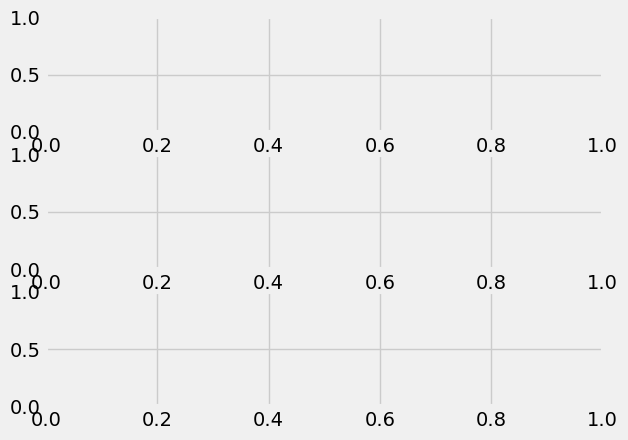

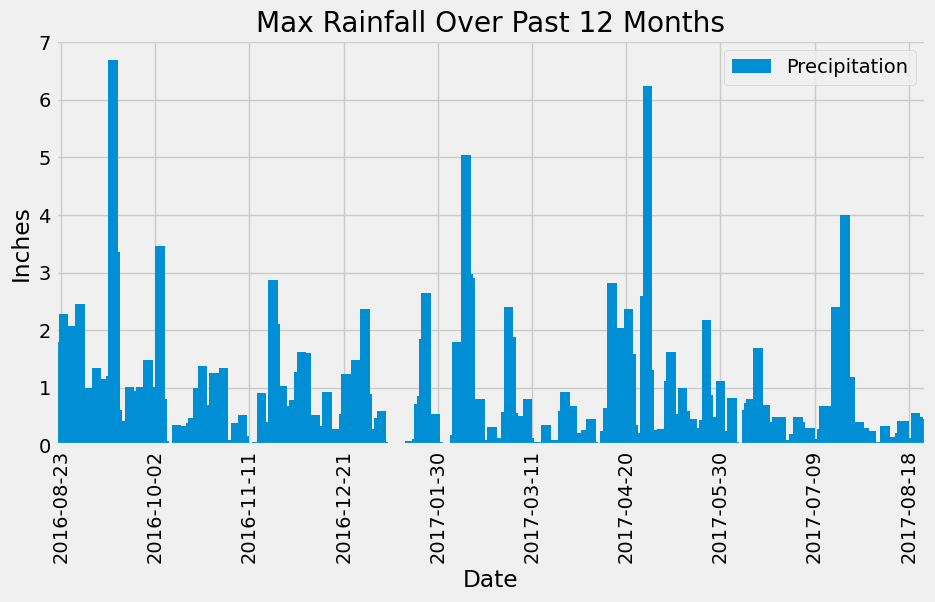

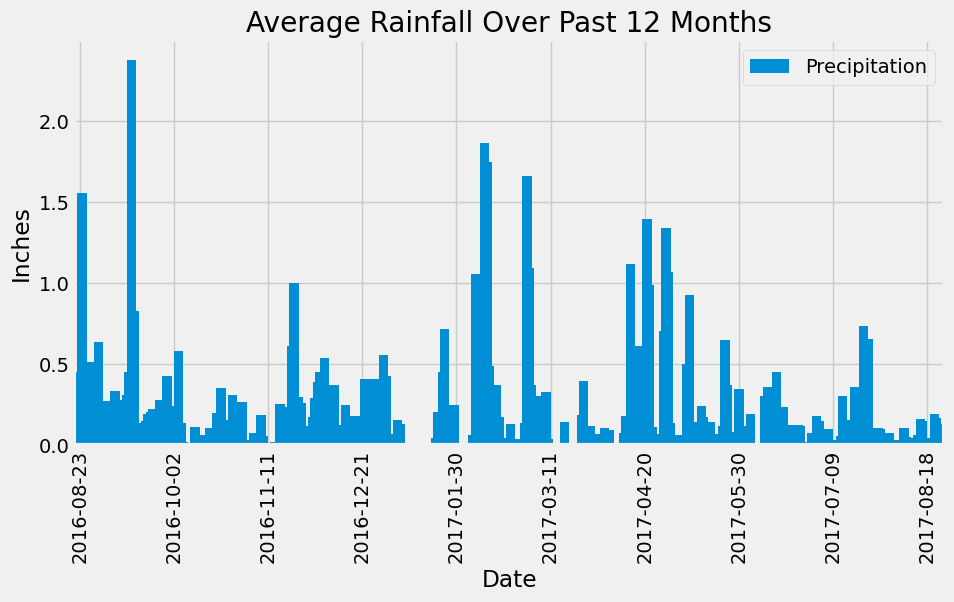

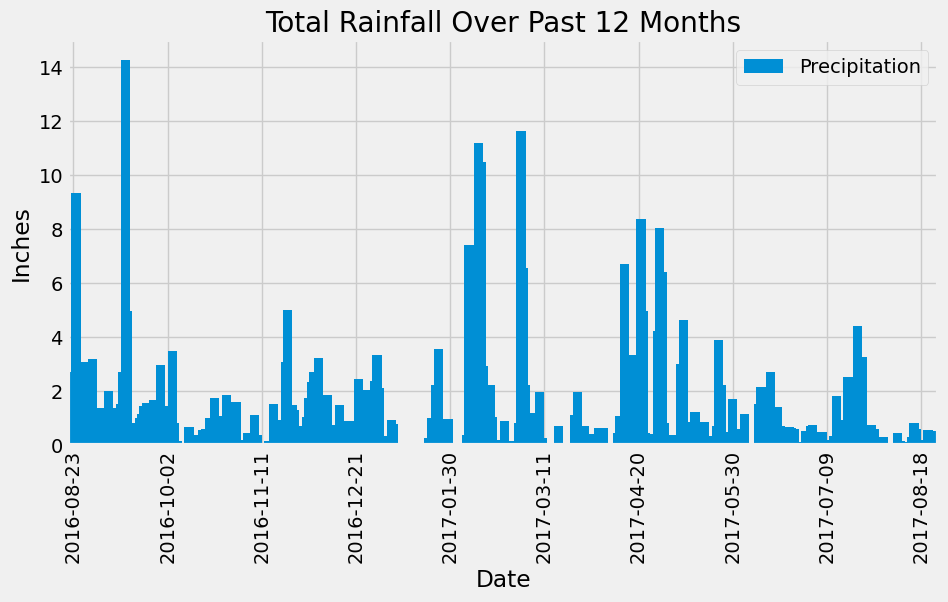

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last = dt.datetime.strptime(most_recent, "%Y-%m-%d").date()
twelve_mo = last - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= twelve_mo)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns=['Date', 'Precipitation'])
prcp = df.set_index('Date')

# Group results by date & get various summary stats to graph
max = prcp.groupby('Date').max()
ave = prcp.groupby('Date').mean()
tot = prcp.groupby('Date').sum()

# Create function to sort each dataframe and graph the results
def plot(df:pd.DataFrame, ax:plt.axes, title:str)->None:

    # Sort the dataframe by date
    sortd = df.sort_index()

    # Use Pandas Plotting with Matplotlib to plot the data
    ax = sortd.plot(kind='bar', figsize=(10, 5), grid=True, width=4)
    ax.set_xticks(ax.get_xticks()[::40])
    plt.ylabel('Inches')
    plt.title(title)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
plot(max, ax1, 'Max Rainfall Over Past 12 Months')
plot(ave, ax2, 'Average Rainfall Over Past 12 Months')
plot(tot, ax3, 'Total Rainfall Over Past 12 Months')
plt.show()

#still need rounded tips and to get rid of random extra blank graph...




In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()